<a href="https://colab.research.google.com/github/SoneyBun/House-Pricing-Calculator/blob/main/House_Pricing_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note from Sunny: The labels are sqft, bedrooms, bathrooms, year built, lot size, and garages.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Virginia_Housing.csv")

In [17]:
print(df.head())
print(df.describe())
print(df.isnull().sum())

   Square_Feet  Bedrooms  Bathrooms  Year_Built  Lot_Size  Garage    Price
0         4074         1          1        2005      1.00       2  1045903
1         4407         5          4        2013      0.60       1  1178627
2         1760         4          4        2020      0.79       1   518361
3         2194         4          2        1986      0.95       1   473518
4         2030         4          4        1983      0.86       0   547558
       Square_Feet    Bedrooms   Bathrooms   Year_Built    Lot_Size  \
count   200.000000  200.000000  200.000000   200.000000  200.000000   
mean   2776.085000    2.800000    2.510000  2001.035000    0.515400   
std    1018.025386    1.403513    1.138588    11.776127    0.254135   
min     921.000000    1.000000    1.000000  1980.000000    0.110000   
25%    1920.750000    1.000000    2.000000  1991.000000    0.277500   
50%    2811.000000    3.000000    2.000000  2001.000000    0.505000   
75%    3668.500000    4.000000    4.000000  2011.0000

In [5]:
X = df[["Square_Feet", "Bedrooms", "Bathrooms", "Year_Built", "Lot_Size", "Garage"]]
y = df["Price"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

In [9]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [10]:
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

R² Score: 0.972
RMSE: 38237.87


In [11]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head(10))

     Actual      Predicted
95   247994  287976.463228
15   978822  997493.689232
30   378355  350756.126856
158  858076  856733.972889
128  667170  661852.918140
115  404540  399804.121618
69   843559  921304.043781
170  401945  449435.058314
174  396682  418840.435243
45   979562  967360.264619


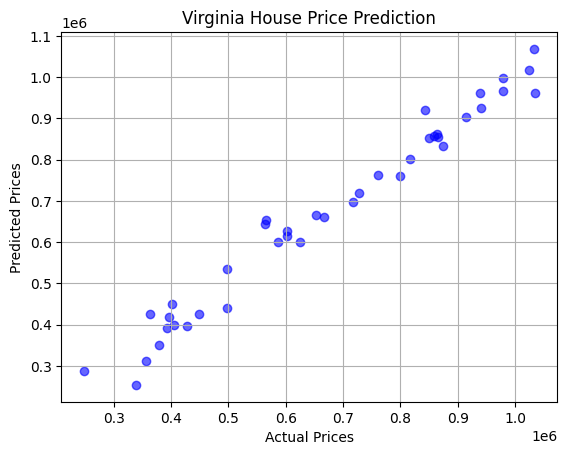

In [12]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Virginia House Price Prediction")
plt.grid(True)
plt.show()

Input the stuff here:

In [23]:
sample = pd.DataFrame({
    "Square_Feet": [700],
    "Bedrooms": [8],
    "Bathrooms": [4],
    "Year_Built": [2025],
    "Lot_Size": [0.49],
    "Garage": [8]
})
predicted_price = model.predict(sample)
print(f"Predicted Price: ${predicted_price[0]:,.2f}")

Predicted Price: $428,526.42
